In [6]:
import zipfile
import os

# Unzip uploaded file
with zipfile.ZipFile("/content/Teeth DataSet.zip", 'r') as zip_ref:
    zip_ref.extractall("Teeth_Dataset")

# Change directory to it if needed
os.listdir("Teeth_Dataset")


['Teeth_Dataset']

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Path to training folder inside unzipped folder
train_dir = '/content/Teeth_Dataset/Teeth_Dataset/Training'

img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 3087 images belonging to 7 classes.


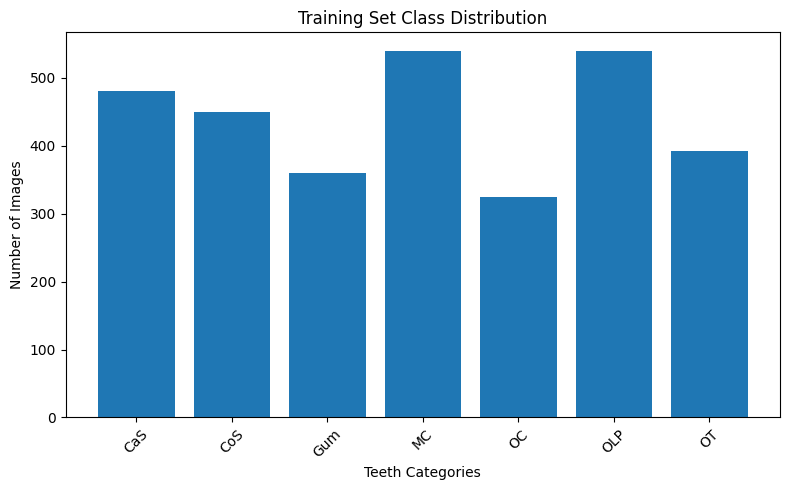

In [8]:
#visualization

# Class names
labels = list(train_generator.class_indices.keys())

# Count how many samples per class
class_counts = train_generator.classes
unique, counts = np.unique(class_counts, return_counts=True)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, counts)
plt.title("Training Set Class Distribution")
plt.xlabel("Teeth Categories")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import os

train_classes = set(os.listdir(train_dir))
val_classes = set(os.listdir(val_dir))
test_classes = set(os.listdir(test_dir))

print("Train classes:", train_classes)
print("Validation classes:", val_classes)
print("Test classes:", test_classes)

print("\nClasses in validation but not in training:", val_classes - train_classes)
print("Classes in training but not in validation:", train_classes - val_classes)

print("\nClasses in test but not in training:", test_classes - train_classes)
print("Classes in training but not in test:", train_classes - test_classes)


Train classes: {'CoS', 'CaS', 'OLP', 'OT', 'OC', 'Gum', 'MC'}
Validation classes: {'CoS', 'CaS', 'OLP', 'OT', 'OC', 'Gum', 'MC'}
Test classes: {'output_image.jpg', 'CoS', 'CaS', 'OLP', 'out', 'OT', 'output', 'outputs', 'OC', 'Gum', 'MC'}

Classes in validation but not in training: set()
Classes in training but not in validation: set()

Classes in test but not in training: {'output', 'outputs', 'out', 'output_image.jpg'}
Classes in training but not in test: set()


In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

val_dir = '/content/Teeth_Dataset/Teeth_Dataset/Validation'
test_dir = '/content/Teeth_Dataset/Teeth_Dataset/Testing'

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

val_test_datagen = ImageDataGenerator(rescale=1./255)



# Validation data generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Test data generator
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


num_classes = train_generator.num_classes
print(f"Number of classes found in training data: {num_classes}")

# Build model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_acc*100:.2f}%")


Found 1028 images belonging to 7 classes.
Found 1507 images belonging to 10 classes.
Number of classes found in training data: 7


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1805 - loss: 1.9575

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.1807 - loss: 1.9572 - val_accuracy: 0.2831 - val_loss: 1.8321
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.2512 - loss: 1.8534 - val_accuracy: 0.3765 - val_loss: 1.7075
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.3088 - loss: 1.7427 - val_accuracy: 0.3930 - val_loss: 1.5969
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.3627 - loss: 1.6493 - val_accuracy: 0.4455 - val_loss: 1.4674
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 427s 4s/step - accuracy: 0.3734 - loss: 1.5928 - val_accuracy: 0.4844 - val_loss: 1.3880
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 427s 4s/step - accuracy: 0.4162 - loss: 1.5279 - val_accuracy: 0.4903 - val_loss: 1.3729
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.4426 - loss: 1.4914 - val_accuracy: 0.5545 - val_loss: 1.2297
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.4936 - loss: 1.3562 - val_accuracy: 0.5428 - val_loss: 1.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-10-4238482657.py", line 72, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 92, in test_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2097, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1878, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 670, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,7] labels_size=[32,10]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_multi_step_on_iterator_89495]

**task 2**

transfer learning with MOBILENET ( few parameters and also good for small data )

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 50
num_classes = 7

train_dir = '/content/Teeth_Dataset/Teeth_Dataset/Training'
val_dir = '/content/Teeth_Dataset/Teeth_Dataset/Validation'
test_dir = '/content/Teeth_Dataset/Teeth_Dataset/Testing'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, zoom_range=0.2, horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)

base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Test accuracy: {test_acc*100:.2f}%")


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1507 images belonging to 10 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3175 - loss: 1.8675

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.3190 - loss: 1.8627 - val_accuracy: 0.6196 - val_loss: 1.0446
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.5931 - loss: 1.0897 - val_accuracy: 0.7471 - val_loss: 0.8143
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.6639 - loss: 0.9101 - val_accuracy: 0.8074 - val_loss: 0.6605
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.7190 - loss: 0.7820 - val_accuracy: 0.8268 - val_loss: 0.5711
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.7239 - loss: 0.7216 - val_accuracy: 0.8619 - val_loss: 0.4965
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.7728 - loss: 0.6354 - val_accuracy: 0.8881 - val_loss: 0.4284
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.7922 - loss: 0.5894 - val_accuracy: 0.8949 - val_loss: 0.3780
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.8138 - loss: 0.5378 - val_accuracy: 0.8852 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-11-3843500501.py", line 54, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 92, in test_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2097, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1878, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 670, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[50,7] labels_size=[50,10]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_multi_step_on_iterator_112886]

**transfer learning on RESNET**

In [1]:
import zipfile
import os

# Unzip uploaded file
with zipfile.ZipFile("/content/Teeth DataSet.zip", 'r') as zip_ref:
    zip_ref.extractall("Teeth_Dataset")

# Change directory to it if needed
os.listdir("Teeth_Dataset")

['Teeth_Dataset']

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


img_height, img_width = 224, 224
batch_size = 32
num_classes = 7

train_dir = '/content/Teeth_Dataset/Teeth_Dataset/Training'
val_dir = '/content/Teeth_Dataset/Teeth_Dataset/Validation'
test_dir = '/content/Teeth_Dataset/Teeth_Dataset/Testing'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    shuffle=False
)


base_model = ResNet50(input_shape=(img_height, img_width, 3),
                      include_top=False,
                      weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Test accuracy: {test_acc*100:.2f}%")


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1507 images belonging to 10 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1541 - loss: 2.0546

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 677s 7s/step - accuracy: 0.1541 - loss: 2.0539 - val_accuracy: 0.1809 - val_loss: 1.9335
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 662s 7s/step - accuracy: 0.1854 - loss: 1.9341 - val_accuracy: 0.2072 - val_loss: 1.9271
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 0.1787 - loss: 1.9302 - val_accuracy: 0.1984 - val_loss: 1.9233
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 0.1936 - loss: 1.9257 - val_accuracy: 0.2091 - val_loss: 1.9191
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 658s 7s/step - accuracy: 0.1902 - loss: 1.9207 - val_accuracy: 0.2053 - val_loss: 1.9127
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 0.1768 - loss: 1.9216 - val_accuracy: 0.2111 - val_loss: 1.9124
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 0.1825 - loss: 1.9158 - val_accuracy: 0.2033 - val_loss: 1.9038
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 656s 7s/step - accuracy: 0.1917 - loss: 1.9112 - val_accuracy: 0.2150 - val_loss: 1.

KeyboardInterrupt: 